In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


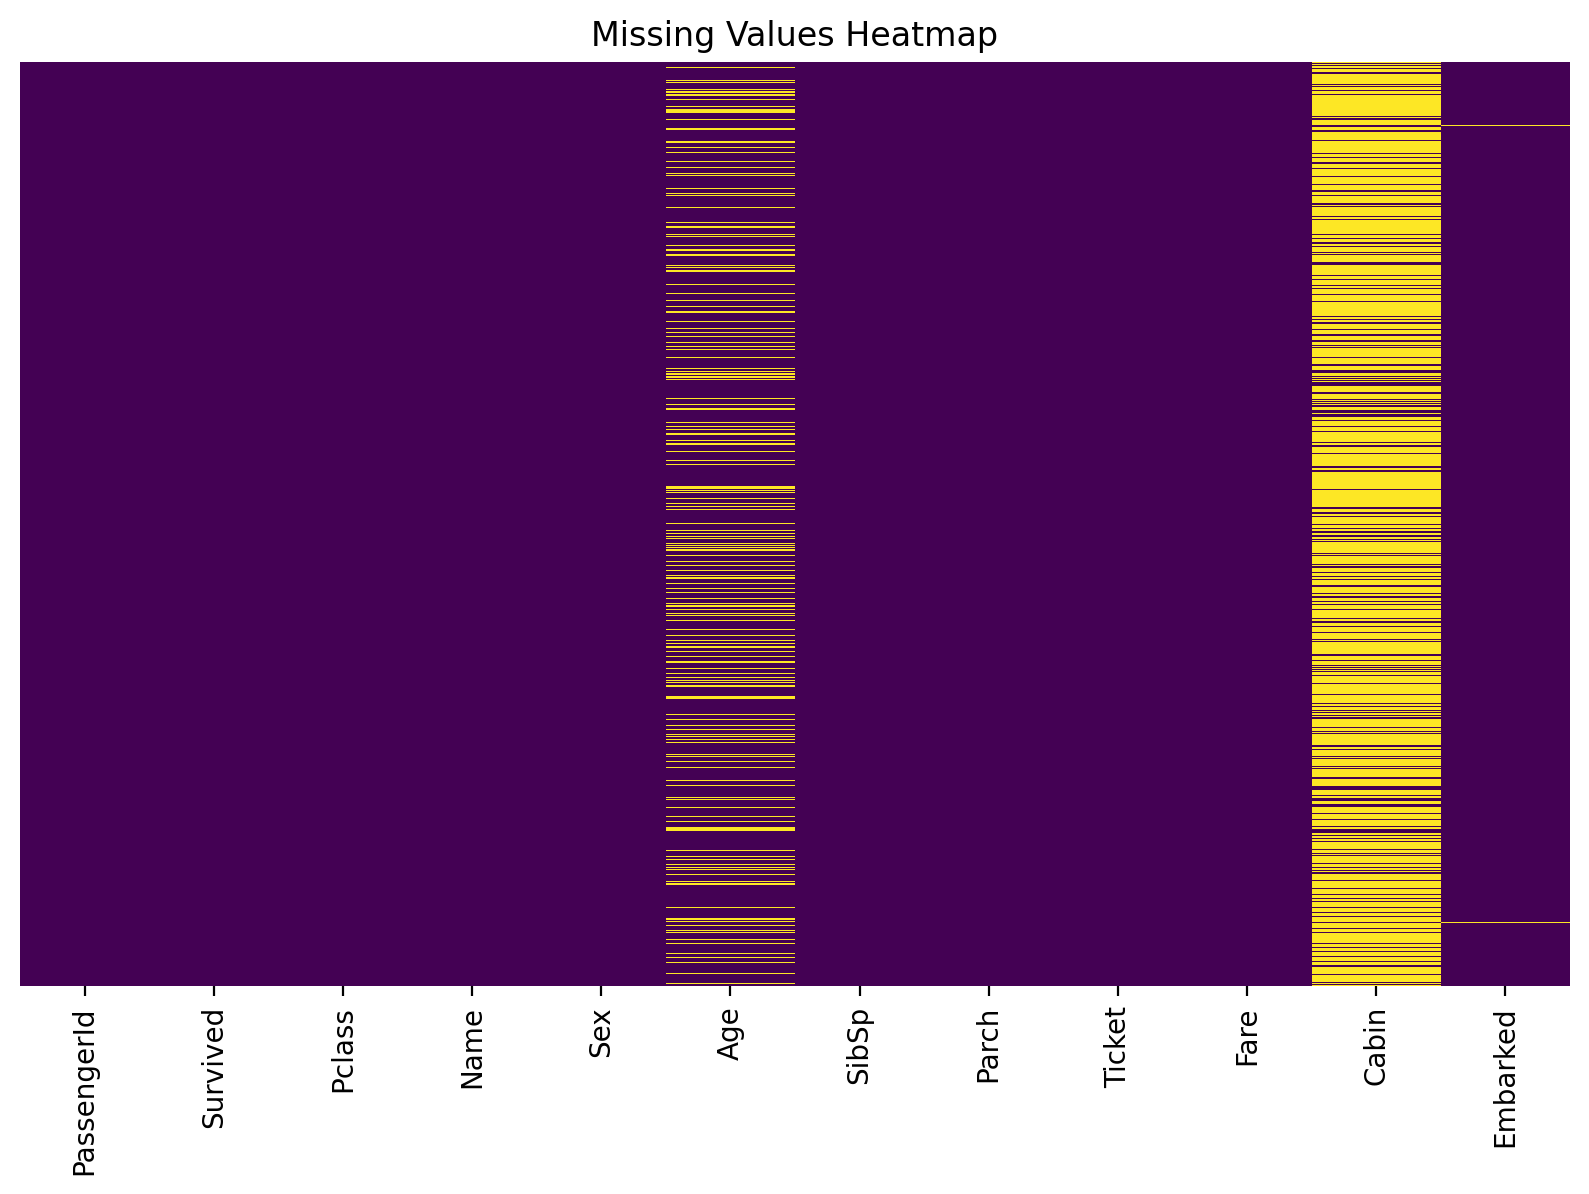

In [7]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


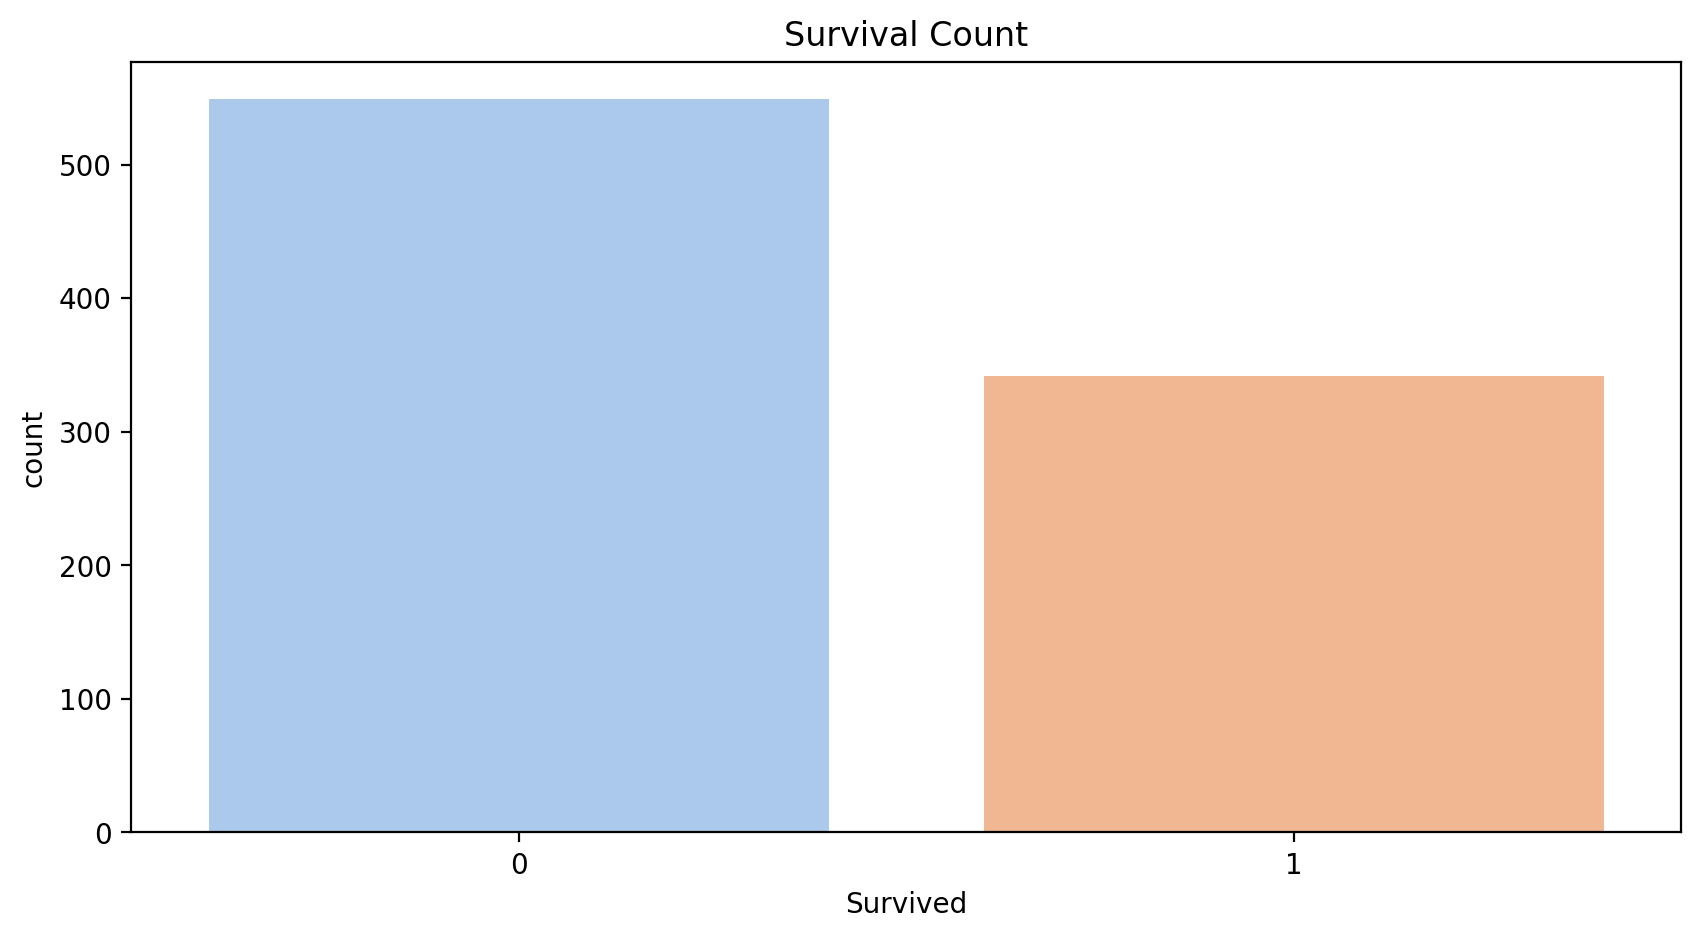

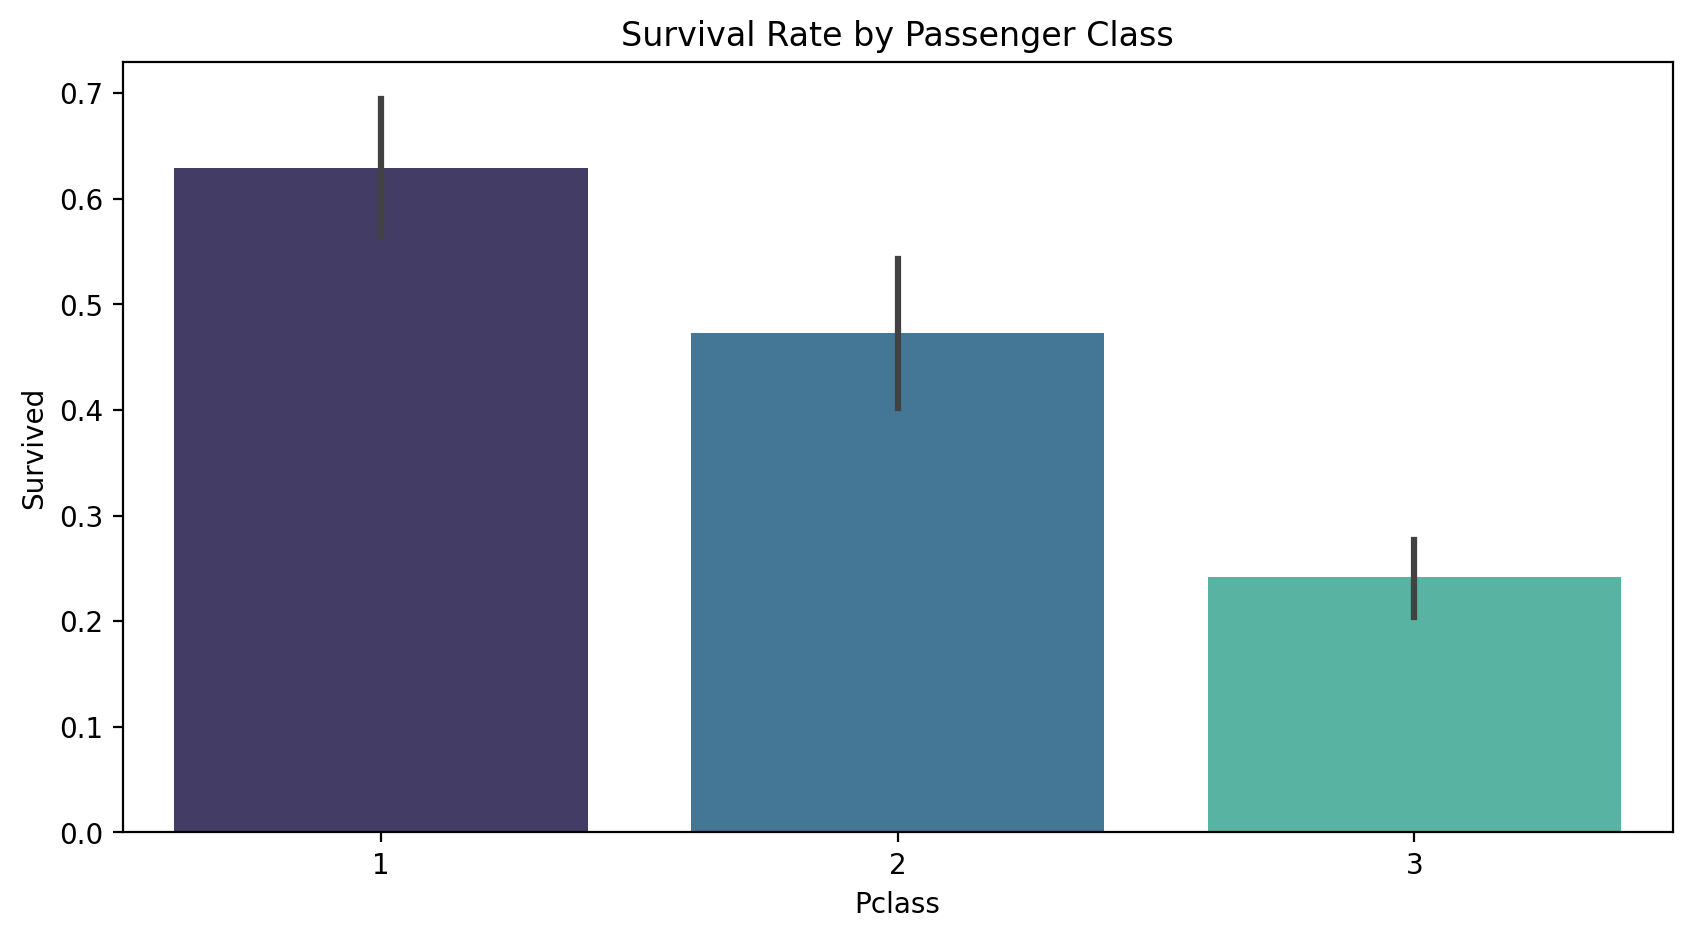

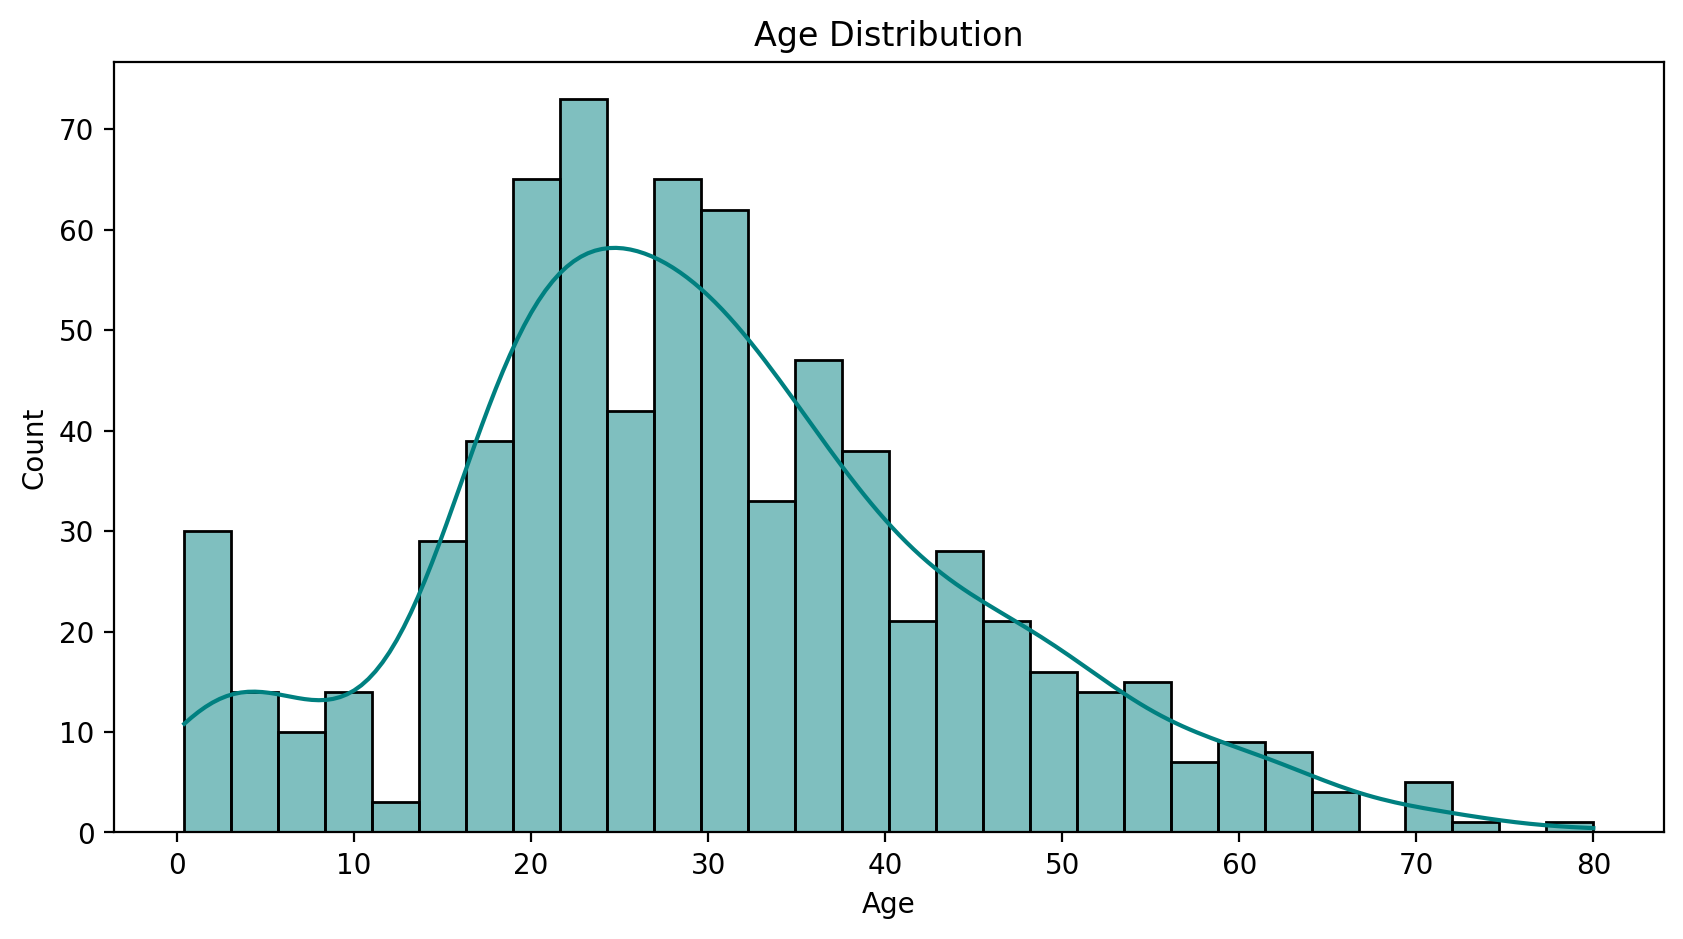

In [9]:
# Visualize the distribution of survival
sns.countplot(x="Survived", data=df, palette="pastel")
plt.title("Survival Count")
plt.show()

# Survival rate by class
sns.barplot(x="Pclass", y="Survived", data=df, palette="mako")
plt.title("Survival Rate by Passenger Class")
plt.show()

# Age distribution
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="teal")
plt.title("Age Distribution")
plt.show()


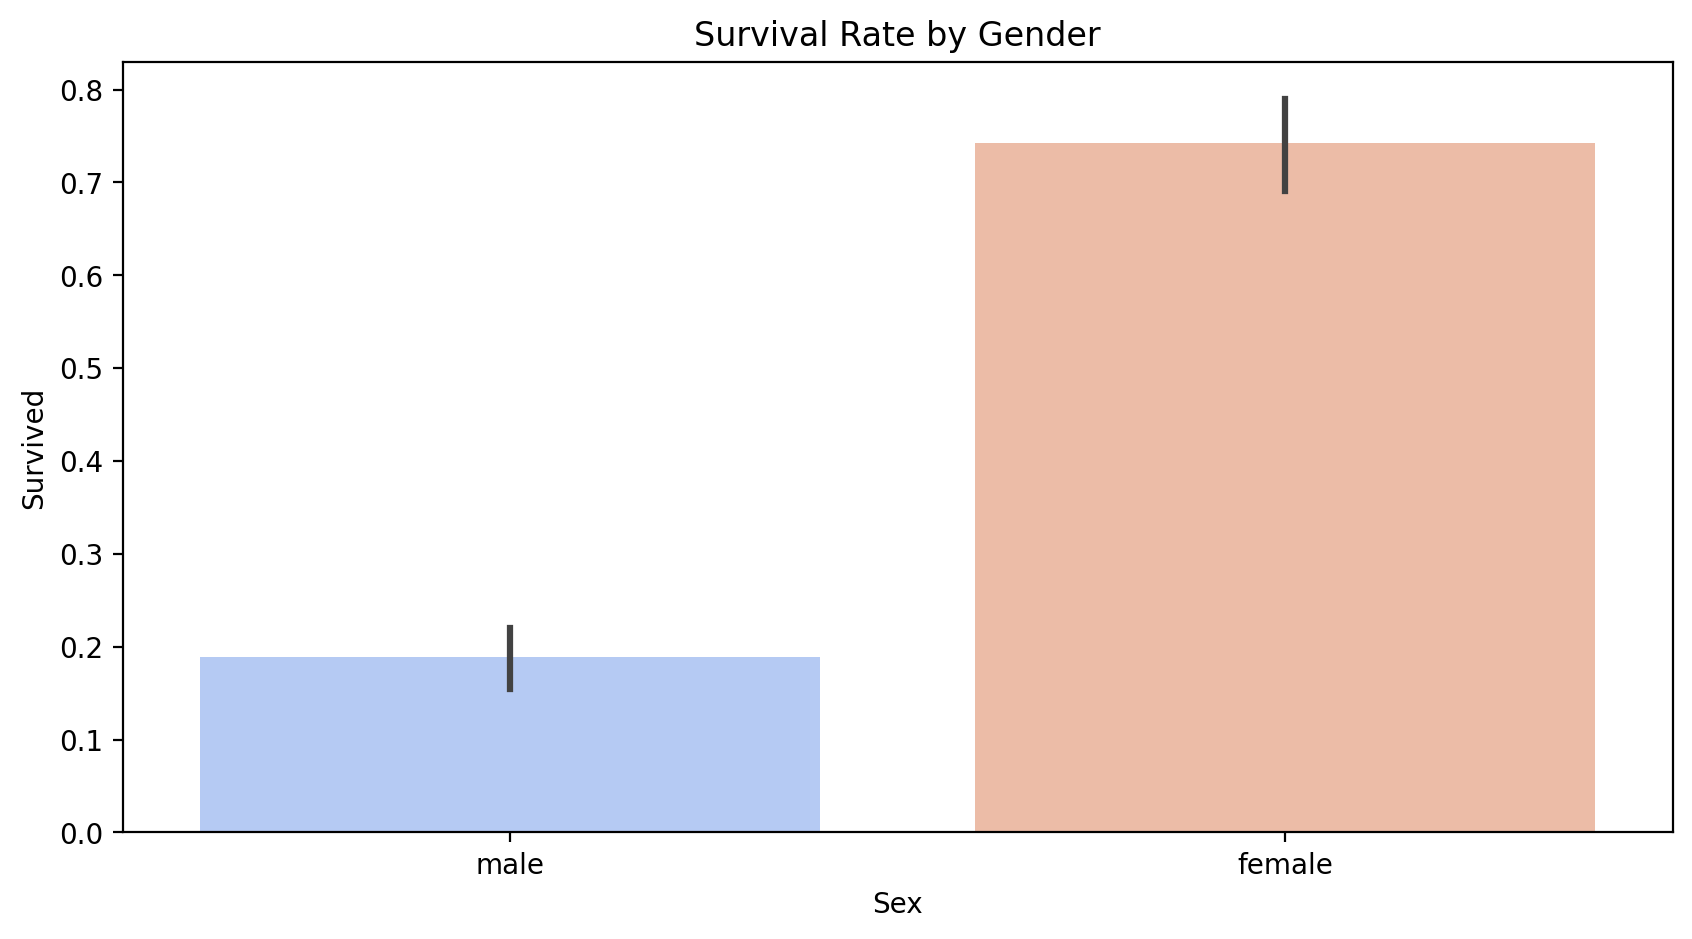

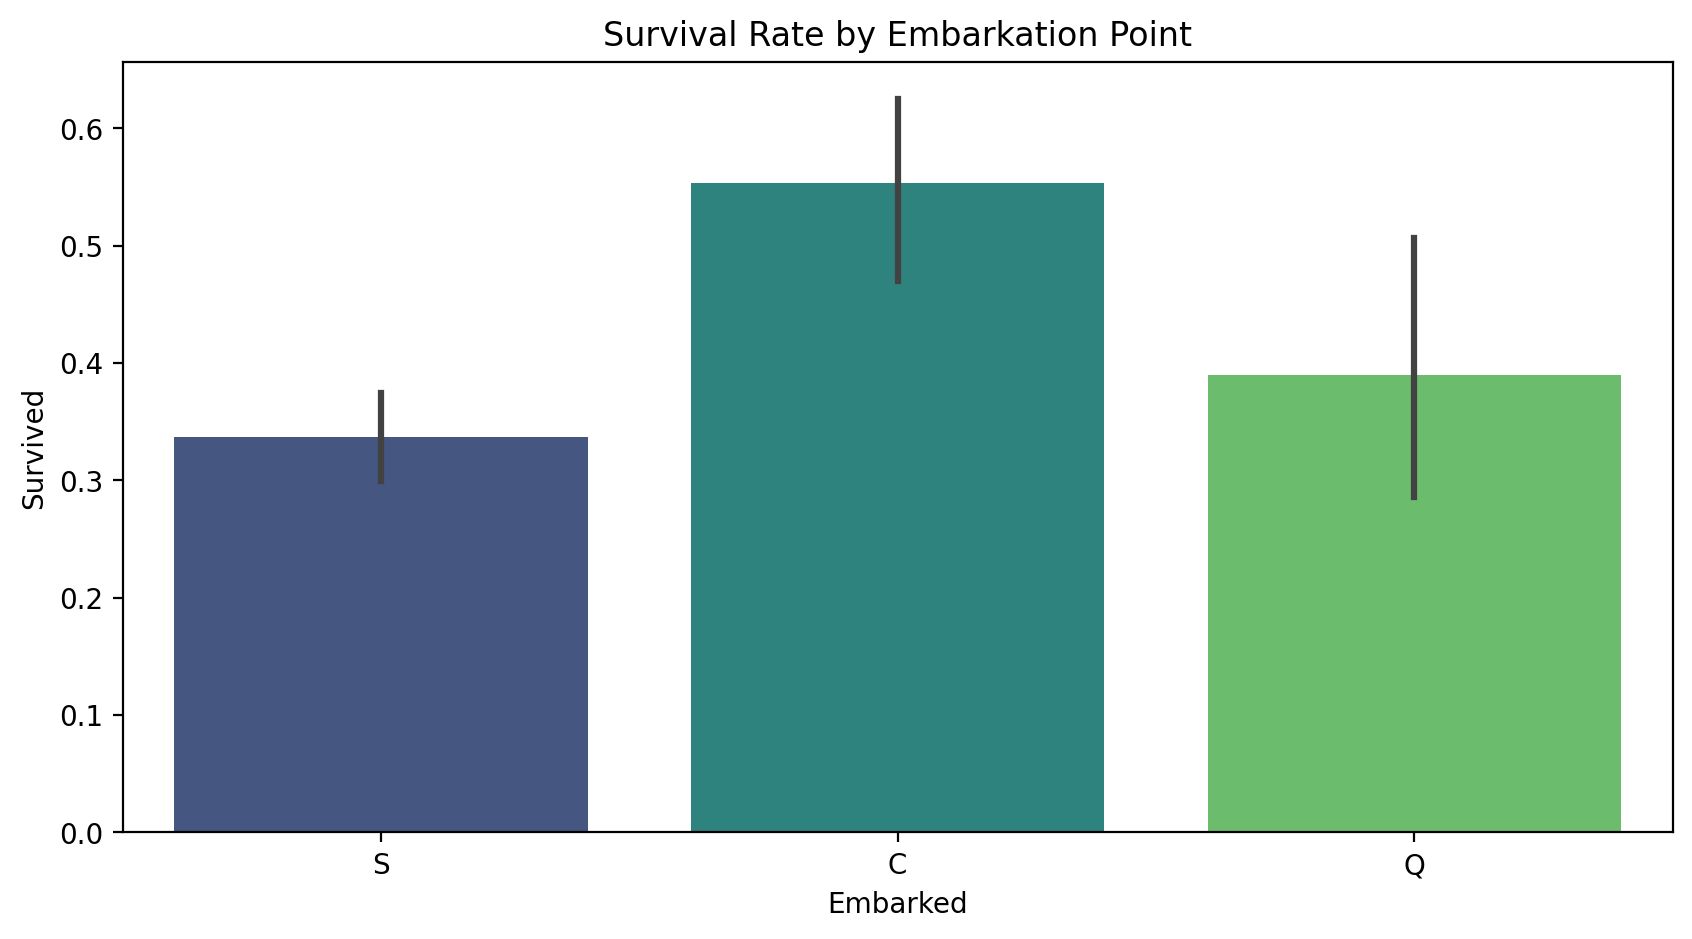

In [11]:
# Sex vs Survival
sns.barplot(x="Sex", y="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.show()

# Embarked vs Survival
sns.barplot(x="Embarked", y="Survived", data=df, palette="viridis")
plt.title("Survival Rate by Embarkation Point")
plt.show()


In [13]:
# Fill missing Age values with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Drop Cabin column (too many missing values)
df.drop("Cabin", axis=1, inplace=True)

# Fill missing Embarked values with the most common value
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' (Male=0, Female=1)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

print(df.head())  # Check the dataset after encoding


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

In [17]:
# Define feature set (X) and target variable (y)
X = df.drop(columns=["Survived", "PassengerId", "Name", "Ticket"])
y = df["Survived"]

print(X.head())  # Check the features


   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500       False        True
1       1    1  38.0      1      0  71.2833       False       False
2       3    1  26.0      0      0   7.9250       False        True
3       1    1  35.0      1      0  53.1000       False        True
4       3    0  35.0      0      0   8.0500       False        True


In [19]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (712, 8)
Testing set size: (179, 8)


In [21]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Accuracy: 0.8045
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



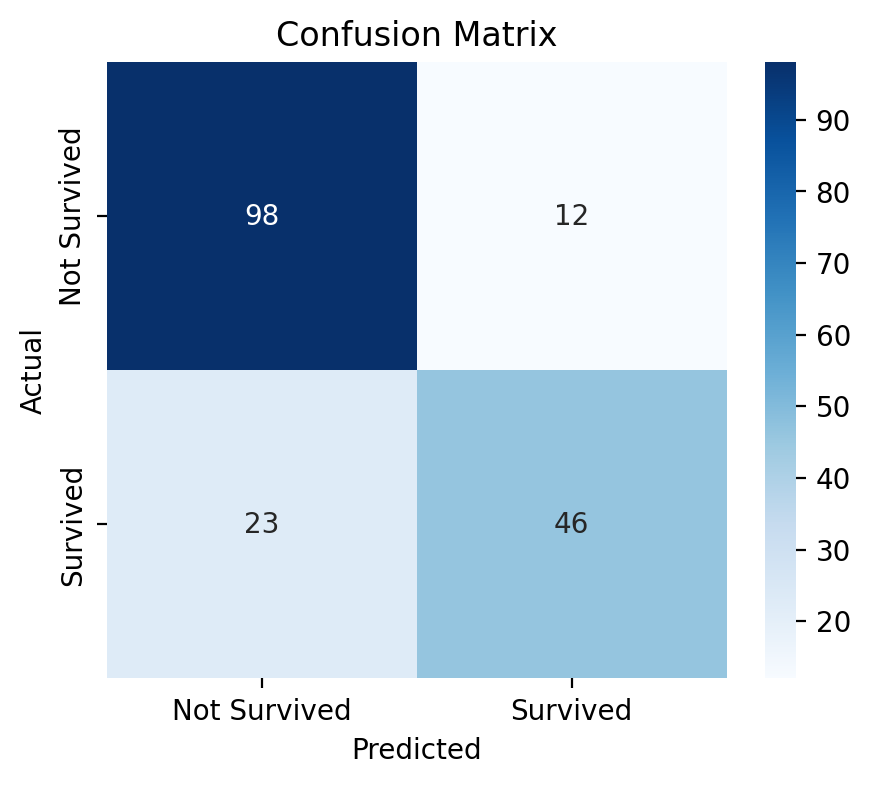

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
test_data = pd.read_csv('Titanic_test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
# Handle missing values
test_data["Age"].fillna(df["Age"].median(), inplace=True)
test_data["Fare"].fillna(df["Fare"].median(), inplace=True)  # Some test data might have missing fares
test_data.drop("Cabin", axis=1, inplace=True)

# Encode categorical variables
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
test_data = pd.get_dummies(test_data, columns=["Embarked"], drop_first=True)

# Drop irrelevant columns
X_test_final = test_data.drop(columns=["PassengerId", "Name", "Ticket"])


In [35]:
# Predict survival using trained model
test_data["Predicted_Survived"] = model.predict(X_test_final)

# Display first 10 predictions
print(test_data[["PassengerId", "Predicted_Survived"]].head(10))


   PassengerId  Predicted_Survived
0          892                   0
1          893                   0
2          894                   0
3          895                   0
4          896                   1
5          897                   0
6          898                   1
7          899                   0
8          900                   1
9          901                   0


In [37]:
from sklearn.metrics import accuracy_score

# Check if actual survival data is available
if "Survived" in test_data.columns:
    y_test_actual = test_data["Survived"]
    y_test_predicted = test_data["Predicted_Survived"]

    # Calculate accuracy
    accuracy = accuracy_score(y_test_actual, y_test_predicted)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Display classification report
    from sklearn.metrics import classification_report
    print("\nClassification Report:\n", classification_report(y_test_actual, y_test_predicted))
else:
    print("Actual survival values are not available in test_data.")


Test Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [43]:
import pickle

# Save trained model as 'titanic_model.pkl'
with open("titanic_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as 'titanic_model.pkl'!")


Model saved successfully as 'titanic_model.pkl'!


In [45]:
import os
print("File exists:", os.path.exists("titanic_model.pkl"))


File exists: True


In [53]:
st.title("Titanic Survival Prediction")


DeltaGenerator()

## Precision measures how many of the predicted positive cases are actually positive. In other words, it tells you the proportion of true positives among all the positives your model predicted. ##
## Precision focuses on the quality of positive predictions (minimizing false positives). ##

## Recall measures how many of the actual positive cases were correctly identified by the model. It’s also referred to as "sensitivity" or "true positive rate." ##
## Recall focuses on the quantity of actual positives detected (minimizing false negatives). ##


## Cross-validation is a technique used in machine learning to evaluate the performance and robustness of a model by testing ## 
## it on different subsets of the data. ## ##
## The dataset is split into multiple subsets (or "folds"), and the model is trained and tested iteratively on these folds.##
## It is important for binary classification to Avoid Overfitting, Detecting Bias, Handling Limited Data. ##